In [1]:
import math
import random
import numpy as np
import import_ipynb
import matplotlib.pyplot as plt

from draw import draw_dot
from engine import Value

importing Jupyter notebook from draw.ipynb
importing Jupyter notebook from engine.ipynb


### Neuron visual representation in Convolutional Neural Network
![Neuron](neuron.jpeg)

### Simple neuron code example

In [2]:
# inputs x1, x2
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')
# weights w1, w2
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')
# bias b (value for convenient manual gradient calculation)
b = Value(6.8813735870195432, label = 'b')

# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1 * w1'
x2w2 = x2*w2; x2w2.label = 'x2 * w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1 + x2w2'
activation = x1w1x2w2 + b; activation.label = 'activation'
output = activation.tanh(); output.label = 'output'

# automatic backprogation
output.backward()

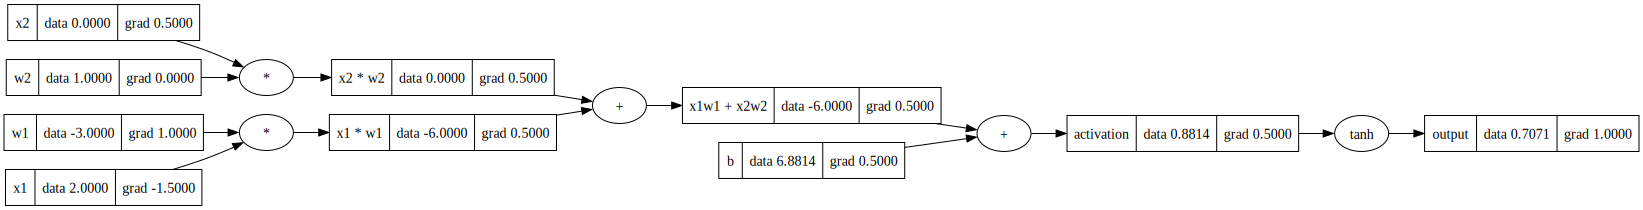

In [3]:
draw_dot(output)

### Neuron class in pyTorch API style

In [4]:
class Neuron:
    
    def __init__(self, numberOfInputs):
        self.w = [Value(random.uniform(-1, 1)) for _ in range(numberOfInputs)]
        self.b = Value(random.uniform(-1, 1))
        
    # forward pass for single neuron
    def __call__(self, x):
        # activation = sum(wi * xi) + b
        activation = sum(wi * xi for wi, xi in zip(self.w, x)) + self.b
        output = activation.tanh()
        return output

In [5]:
# single neuron instance with random weights and bias
x = [2.0, 3.0]
neuron = Neuron(len(x))
neuron(x)

Value(data=-0.9995318155069318)

### Simple Neural Network visual representation
![Neural_network](neural_network.jpeg)

In [6]:
# layer of neurons is just a list of neurons equal to numberOfOutputs, where numberOfInputs means how many inputs each neuron in layer has
class Layer:
    
    def __init__(self, numberOfInputs, numberOfOutputs):
        self.neurons = [Neuron(numberOfInputs) for _ in range(numberOfOutputs)]
        
    # forward pass for layer
    def __call__(self, x):
        return [neuron(x) for neuron in self.neurons]

In [8]:
# single layer of 4 neurons where each neuron has 3 inputs equal to x
x = [2.0, 3.0, 4.0]
layer = Layer(len(x), 4)
layer(x)

[Value(data=0.9999959954410534),
 Value(data=0.9314161393123038),
 Value(data=0.9998417504299171),
 Value(data=-0.42921845203949927)]